- 📚 데이터 사이언티스트의 실전노트, 이지영, [비제이퍼블릭](https://bjpublic.tistory.com/) 
- 🌟 [YouTube: 통계학 & 데이터과학](https://https://www.youtube.com/channel/UC2BreMMPUd0djRpA4UEaD3Q)
- 💻 [클래스101: 데이터 과학자 실무 프로젝트 (분석+예측모델 + AWS 자동화)](https://class101.page.link/MhG4)


## 부록 2 프로그래밍 활용하기

### 부록 2.1.1 판다스 (Page 428)

In [1]:
# 판다스 라이브러리 불러온 후 pd로 지정
import pandas as pd

# 시리즈 두 개 생성하기 
series_1 = pd.Series(["a", "b", "c", "d", "e"])
series_2 = pd.Series([1, 2, 3., 4, 'five'])

# 인덱스를 따로 지정하지 않으면 0, 1, 2, ... 정수로 인덱스가 지정됨
print(f'series_2 Shape:{series_2.shape}') # 행과 열을 튜플(사용자가 값을 바꿀 수 없음)로 표시
print(f'series_2 \n{series_2}, \n')

# 두 개 시리즈를 합쳐 데이터프레임으로 변환
df_ex1 = pd.DataFrame({'A': series_1,
                       'B':series_2})

print(f'df_ex1 Shape:{df_ex1.shape}') # 행과 열을 튜플로 표시
df_ex1


series_2 Shape:(5,)
series_2 
0       1
1       2
2     3.0
3       4
4    five
dtype: object, 

df_ex1 Shape:(5, 2)


,A,B
0,a,1
1,b,2
2,c,3.0
3,d,4
4,e,five


In [2]:
# 인덱스 지정
idx = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

# 지정한 인덱스로 시리즈 생성
series_1 = pd.Series(list(range(1, 11)), index= idx)
series_2 = pd.Series(list(range(11, 21)), index= idx)
series_3 = pd.Series(list(range(21, 31)), index= idx)

# 시리즈에서 데이터프레임으로 변환
df_ex1 = pd.DataFrame({'column_A': series_1,
                       'column_B': series_2, 
                       'column_C': series_3})
df_ex1


,column_A,column_B,column_C
a,1,11,21
b,2,12,22
c,3,13,23
d,4,14,24
e,5,15,25
f,6,16,26
g,7,17,27
h,8,18,28
i,9,19,29
j,10,20,30


In [3]:
# .loc로 조건을 사용해 값을 변환 
df_ex1.loc[df_ex1['column_A'] < 5,'column_C']= 100

# 특정 값을 다른 값으로 변환
df_ex1.iat[5, 1] = 500 

# replace()으로 값 변환
df_ex1 = df_ex1.replace([10, 20, 30], ['X', 'Y', 'Z'])

# 최종 데이터프레임 
df_ex1


,column_A,column_B,column_C
a,1,11,100
b,2,12,100
c,3,13,100
d,4,14,100
e,5,15,25
f,6,500,26
g,7,17,27
h,8,18,28
i,9,19,29
j,X,Y,Z


### 부록 2.1.2 넘파이 (Page 433)

In [4]:
import numpy as np

# 함수에 배열을 넣으면 배열에 관한 정보를 나타내는 함수 
def get_info(arry): 
    print(f'<배열 정보>\n{arry}')
    print(f'* 차원 수: {arry.ndim}') 
    print(f'* Shape: {arry.shape}') # 크기
    print(f'* 데이터 타입: {arry.dtype}') 
    print(f'* Size: {arry.size}')


In [5]:
# 1차원 배열 예시 
dim1 = np.array([1,2,3,4,5])
get_info(dim1)

# 숫자와 문자가 섞인 경우, 배열은 문자열(<U32)로 변환
dim1_mixed = np.array([1,2.3,"3", 4, 5])
get_info(dim1_mixed)


<배열 정보>
[1 2 3 4 5]
* 차원 수: 1
* Shape: (5,)
* 데이터 타입: int64
* Size: 5
<배열 정보>
['1' '2.3' '3' '4' '5']
* 차원 수: 1
* Shape: (5,)
* 데이터 타입: <U32
* Size: 5


In [6]:
dim2 = np.array([[1,2,3,4,5],[6,7,8,9,10]])
get_info(dim2)


<배열 정보>
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
* 차원 수: 2
* Shape: (2, 5)
* 데이터 타입: int64
* Size: 10


In [7]:
dim3 = np.array([[[1, 1, 1, 1], 
                  [1, 1, 1, 1]],
                 [[2, 2, 2, 2], 
                  [2, 2, 2, 2]],
                 [[3, 3, 3, 3], 
                  [3, 3, 3, 3]]])
get_info(dim3)


<배열 정보>
[[[1 1 1 1]
  [1 1 1 1]]

 [[2 2 2 2]
  [2 2 2 2]]

 [[3 3 3 3]
  [3 3 3 3]]]
* 차원 수: 3
* Shape: (3, 2, 4)
* 데이터 타입: int64
* Size: 24


### 부록 2.1.3 .loc(), apply(), where() 속도 비교 (Page 438)

In [8]:
from IPython.core.display import display, HTML
def df_display(dfs:list, captions:list):
    """ 데이터 프레임을 나란히 보여줌
        dfs: 데이터 프레임 리스트
        captions: 각 데이터 테이블의 설명
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0"
    display(HTML(output))

In [9]:
# 인덱스 지정
idx = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

# 지정한 인덱스로 시리즈 생성
series_1 = pd.Series(list(range(1, 11)), index= idx)
series_2 = pd.Series(list(range(11, 21)), index= idx)
series_3 = pd.Series(list(range(21, 31)), index= idx)

# 시리즈에서 데이터프레임으로 변환
df_ex1 = pd.DataFrame({'column_A': series_1,
                       'column_B': series_2, 
                       'column_C': series_3})
df_ex1


,column_A,column_B,column_C
a,1,11,21
b,2,12,22
c,3,13,23
d,4,14,24
e,5,15,25
f,6,16,26
g,7,17,27
h,8,18,28
i,9,19,29
j,10,20,30


In [10]:
df_ex1_org = df_ex1.copy()

In [11]:
# df_ex1 데이터프레임을 df_ex_org에 복사 
df_ex1_org = df_ex1.copy()

# loc를 이용해 column_A값을 2로 나눴을 때 나머지가 0인 경우 그 값을 0으로 변환
df_ex1.loc[df_ex1['column_A'] % 2 == 0,'column_A']= 0

# apply를 이용해 column_B값을 2로 나눴을 때 나머지가 0인 경우 그 값을 0으로 변환
df_ex1["column_B"] = df_ex1["column_B"].apply(lambda x: x if x%2 != 0 else 0)

# where를 이용해 column_C 값을 2로 나눴을 때 나머지가 0인 경우, 그 값을 0으로 변환
df_ex1["column_C"] = np.where(df_ex1["column_C"]% 2 == 0, 0, df_ex1["column_C"])

df_display([df_ex1_org, df_ex1], 
           ['df_ex1 데이터', '값 변환 후 데이터'])



,column_A,column_B,column_C
a,1,11,21
b,2,12,22
c,3,13,23
d,4,14,24
e,5,15,25
f,6,16,26
g,7,17,27
h,8,18,28
i,9,19,29
j,10,20,30


In [12]:
# 시간 계산 라이브러리 
from timeit import timeit 

# 데이터 준비 
series_1 = pd.Series(list(range(1, 11)))
df_ex1 = pd.DataFrame({'column_l': series_1,
                       'column_a': series_1, 
                       'column_w': series_1})

# 데이터 크기가 10^4, 10^5, 10^6, 10^7 커질 때 각 방법의 작업 소요 시간 계산
size_list = [] # 실험에 사용될 데이터 크기 
time_loc = [] # loc을 이용했을 때 작업 시간 저장할 리스트
time_apply = [] # apply를 이용했을 때 작업 시간 저장할 리스트
time_where = [] # where를 이용했을 때 작업 시간 저장할 리스트
num = 50 # timeit에서 사용될 반복 횟수

# 참고) 계산 시간이 오래 걸릴 수 있으므로 범위를 [10, 100, 1000, 10000] 으로 바꿔보세요.
for i in np.array([10000, 100000, 1000000, 10000000]): 
    
    print(i)
    
    # 데이터 준비
    df_big = pd.concat([df_ex1]*i, ignore_index=True)
    size_list.append(len(df_big)) # 데이터 크기 저장     

    # 실험 1: .loc() 이용 시간 계산
    exp_loc = '''df_big.loc[df_big['column_l'] % 2 == 0,'column_l']= 0'''
    exp_loc_time = timeit(stmt = exp_loc, 
                                 globals ={'df_big': df_big},
                                 number = num)
    time_loc.append(exp_loc_time/num)
    
    # 실험 2: .apply() 이용 시간 계산
    exp_apply = '''df_big["column_a"] = df_big["column_a"].apply(lambda x: x if x%2 != 0 else 0)'''
    exp_apply_time = timeit(stmt = exp_apply, 
                               globals ={'df_big': df_big},
                               number = num) 
    time_apply.append(exp_apply_time/num)
    
    # 실험 3: .where() 이용 시간 계산
    exp_where = '''df_big["column_w"] = np.where(df_big["column_w"]% 2 == 0, 0, df_big["column_w"])
'''
    exp_where_time = timeit(stmt = exp_where, 
                               globals ={'df_big': df_big, "np":np},
                               number = num) 
    time_where.append(exp_where_time/num)


10000
100000
1000000
10000000


In [3]:
# 그래프 관련 라이브러리 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

Text(0, 0.5, '시간 (초)')

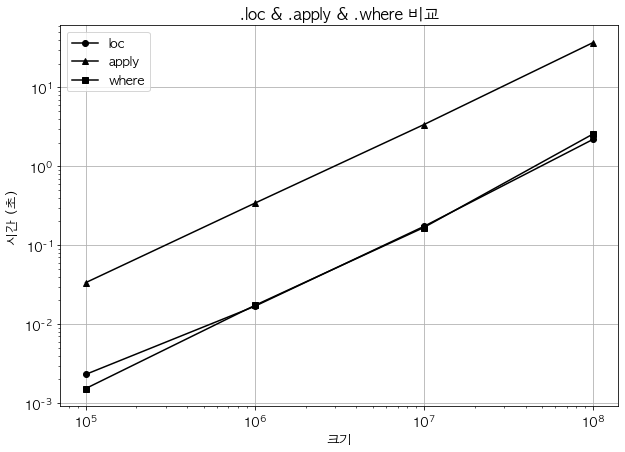

In [14]:
# 그래프 설정 
size = 13 
params = {'figure.figsize': [10, 7], # 그래프 사이즈 설정
        'legend.fontsize': size,
        'font.size':size, 
        'figure.titlesize': size*1.3,
        'axes.labelsize': size,
        'xtick.labelsize': size,
        'ytick.labelsize': size, 
        'mathtext.rm': 'Arial', # 한글 폰트 사용시 마이너스 폰트 깨짐 해결 (Mac OS)
        'mathtext.fontset': 'custom',
         }
plt.rcParams.update(params)
rc('font', family='AppleGothic') # 한글 폰트 깨짐 수정 (Mac OS)


# 세 개의 실험 결과값 그래프 그리기
fig, ax = plt.subplots()
ax.loglog() # 각 축 로그 스케일링으로 값 변환
ax.plot(size_list, time_loc, marker="o", lw=1.5, color='black', label='loc')
ax.plot(size_list, time_apply, marker="^", lw=1.5, color='black', label='apply')
ax.plot(size_list, time_where, marker="s", lw=1.5, color='black', label='where')
plt.grid(True) # 그리드(격자) 설정
plt.legend(loc='upper left') # 범례 위치 설정
plt.title(".loc & .apply & .where 비교")
plt.xlabel("크기")
plt.ylabel("시간 (초)")


In [5]:
def non_vec(x, y):
    output = []
    for i in range(len(x)):
        output.append(x[i]*y[i])
    return output

def vec(x, y):
    return x * y

a = np.arange(1,101) # 1차원 배열 만들기
get_info(a) # 배열 a 정보

# 반복문으로 계산했을 때 작업 시간
print(f'non_vec 함수 사용 (결괏값 일부):', non_vec(a,a)[:10])
%timeit non_vec(a,a)

# 벡터화했을 때 작업 시간
print(f'vec 함수 사용 (결괏값 일부):', vec(a,a)[:10])
%timeit vec(a,a)


<배열 정보>
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
* 차원 수: 1
* Shape: (100,)
* 데이터 타입: int64
* Size: 100
non_vec 함수 사용 (결괏값 일부): [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
25.2 µs ± 309 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
vec 함수 사용 (결괏값 일부): [  1   4   9  16  25  36  49  64  81 100]
518 ns ± 27.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [16]:
# 배열과 리스트의 차이 
arr = np.array([1, 2, 3, 4, 5])
print(f'배열 arr: {arr}')
print(f'arr 각 원소 2배하기: {arr*2}')

lst = [1, 2, 3, 4, 5]
print(f'리스트 lst: {lst}')
print(f'arr와 같은 연산자(*) 사용: {lst*2}')
print(f'lst 각 원소 2배하기 (반복문 사용):{[i*2 for i in lst]}')


배열 arr: [1 2 3 4 5]
arr 각 원소 2배하기: [ 2  4  6  8 10]
리스트 lst: [1, 2, 3, 4, 5]
arr와 같은 연산자(*) 사용: [1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
lst 각 원소 2배하기 (반복문 사용):[2, 4, 6, 8, 10]


⚠ 저작권: Copyright 2022. (이지영) all rights reserved. 본 자료는 저작권법에 의하여 보호받는 저작물로서 이에 대한 무단 복제 및 배포를 원칙적으로 금합니다. 협의 없이 배포하거나 무단으로 사용할 경우 저작권법 제136조, 137조, 138조 위반으로 사전 경고 없이 손해배상 청구 등 민,형사상의 책임과 처벌을 받을 수 있습니다.